In [62]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import LogisticRegression
dataset = pd.read_csv("logistic.csv")
dataset

,age,have_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


In [63]:
x = dataset.iloc[:,:-1].values
print("Training Attribute x =")
print(*x,sep=",") 
y = dataset.iloc[:,-1].values
print("Test Attribute y =")
print(y,sep=",") 

Training Attribute x =
[22],[25],[47],[52],[46],[56],[55],[60],[62],[61],[18],[28],[27],[29],[49]
Test Attribute y =
[0 0 1 0 1 1 0 1 1 1 0 0 0 0 1]


In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
print("XTrain =")
print(*x_train,sep=",")
xtest = x_test.reshape(-1, 1)
print()
print("XTest =")
print(*x_test,sep=",")
print()
print("YTrain =")
print(*y_train,sep=",")
print()
print("YTest =")
print(y_test,sep=",")

XTrain =
[49],[46],[47],[29],[18],[60],[28],[52],[22],[56],[27]

XTest =
[25],[55],[62],[61]

YTrain =
1,1,1,0,0,1,0,0,0,1,0

YTest =
[0 0 1 1]


In [65]:
clf = LogisticRegression(random_state=0).fit(x_train, y_train)

In [66]:
predictions = clf.predict(x_test[0:])
predictions

array([0, 1, 1, 1], dtype=int64)

In [67]:
score = clf.score(x_test, y_test)
print(score)

0.75


In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[1 1]
 [0 2]]


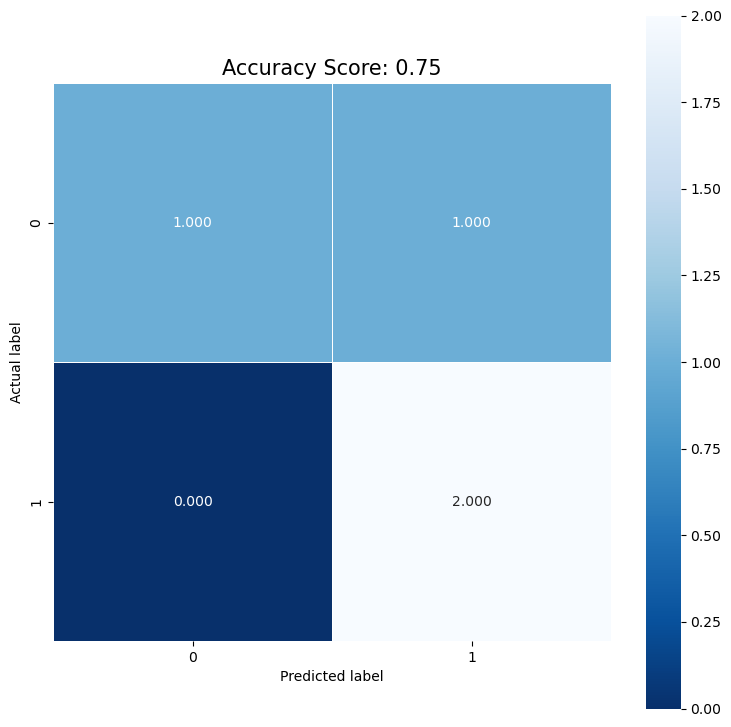

In [69]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);